<a href="https://colab.research.google.com/github/BrotherKim/Colab/blob/main/SEP592/BK_resnet50_JT_BRCA_classification_ROC_300_300.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['ROOTDIR'] = "/content/jt_breast_aug"

In [ ]:
!mkdir -p $ROOTDIR
!unzip /content/gdrive/MyDrive/breast_aug.zip -d $ROOTDIR

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/jt_breast_aug/TIL/train___TIL__TCGA-05-4417-01Z-00-DX1_azhao__2090_1_2.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_1__292_2_1.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_5__2524_1_2.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_1__593_2.png  
  inflating: /content/jt_breast_aug/TIL/test___TIL__TCGA-05-4396-01Z-00-DX1_azhao__580_2_1.png  
  inflating: /content/jt_breast_aug/TIL/test___TIL__luad_batch_1__645_2_2.png  
  inflating: /content/jt_breast_aug/TIL/test___TIL__TCGA-A2-A04Y-01Z-00-DX1_agreement__119_1_3.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__TCGA-A2-A04P-01Z-00-DX1_agreement__181_2.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_1__1561_2.png  
  inflating: /content/jt_breast_aug/TIL/valid___TIL__TCGA-A2-A04Y-01Z-00-DX1_agreement__18_2_1.png  
  inflating: /content/jt_breast_aug/TIL/train___TIL__luad_batch_

In [ ]:
!ls -1 $ROOTDIR

Normal
TIL


In [ ]:
!mkdir -p $ROOTDIR/train_set/
!mkdir -p $ROOTDIR/test_set/TIL
!mkdir -p $ROOTDIR/test_set/Normal
!mkdir -p $ROOTDIR/valid_set/TIL
!mkdir -p $ROOTDIR/valid_set/Normal

In [ ]:
!cd $ROOTDIR/TIL && ls -1 | wc -l

48712


In [ ]:
!cd $ROOTDIR/TIL && ls -1 | head -4800 | xargs -i mv "{}" $ROOTDIR/test_set/TIL

In [ ]:
!cd $ROOTDIR/TIL && ls -1 | head -4800 | xargs -i mv "{}" $ROOTDIR/valid_set/TIL

In [ ]:
!cd $ROOTDIR/TIL && ls -1 | wc -l

48712


In [ ]:
!mv $ROOTDIR/TIL $ROOTDIR/train_set/TIL

In [ ]:
!cd $ROOTDIR/Normal && ls -1 | wc -l

52888


In [ ]:
!cd $ROOTDIR/Normal && ls -1 | head -5280 | xargs -i mv "{}" $ROOTDIR/test_set/Normal

In [ ]:
!cd $ROOTDIR/Normal && ls -1 | head -5280 | xargs -i mv "{}" $ROOTDIR/valid_set/Normal

In [ ]:
!cd $ROOTDIR/Normal && ls -1 | wc -l

42328


In [ ]:
!mv $ROOTDIR/Normal $ROOTDIR/train_set/Normal

In [ ]:
!cd $ROOTDIR/train_set/TIL && ls -1 | wc -l
!cd $ROOTDIR/train_set/Normal && ls -1 | wc -l
!cd $ROOTDIR/test_set/TIL && ls -1 | wc -l
!cd $ROOTDIR/test_set/Normal && ls -1 | wc -l
!cd $ROOTDIR/valid_set/TIL && ls -1 | wc -l
!cd $ROOTDIR/valid_set/Normal && ls -1 | wc -l

39112
42328
4800
5280
4800
5280


# Dataset 형태
datasets<br>
    &emsp;&emsp;└── test_set<br>
    &emsp;&emsp;│   &emsp;&emsp;├── class1<br>
    &emsp;&emsp;│   &emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
    &emsp;&emsp;│   &emsp;&emsp;└── class2<br>
    &emsp;&emsp;│       &emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>
    &emsp;&emsp;└── training_set<br>
        &emsp;&emsp;&emsp;&emsp;├── class1<br>
        &emsp;&emsp;&emsp;&emsp;│   &emsp;&emsp;└── datas...<br>
        &emsp;&emsp;&emsp;&emsp;└── class2<br>
            &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;└── datas...<br>


# Parameter 및 Basemodel 설정

In [ ]:
IMAGE_SIZE = 224
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
NUM_CLASSES = 2
WEIGHT_DIR_PATH = '/content/gdrive/MyDrive/KAIST/SEP592/checkpoints'
WEIGHT_FILE_PATH = '20210608_resnet50_jt_brca.h5'

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, pooling='avg', classes=NUM_CLASSES)
#baseModel = ResNet50(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE, classes=NUM_CLASSES)
#baseMode =ResNet50(include_top=True, weights=None, input_shape=INPUT_SHAPE, classes=NUM_CLASSES)

baseModel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 위노그라드 알고리즘 설정
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'

#rootPath = '/content/datasets'
#rootPath = '/content/gdrive/MyDrive/KAIST/SEP592/jt_breast_aug'
rootPath = os.environ['ROOTDIR']

imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
)

In [ ]:
#!find /content/gdrive/MyDrive/KAIST/lym_augmentation -type f | wc -l

In [ ]:
#!cp -r /content/gdrive/MyDrive/KAIST/lym_aug1mentation/* /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/lym/

In [ ]:
#!find /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/lym -type f | wc -l

In [ ]:
#!cd /content/gdrive/MyDrive/KAIST/lym_aug1mentation/ && find ./ -name "*aug*" | sed -e 'p' -e "s/aug/aug1/g" |xargs -n 2 mv


In [ ]:
#!find /content/gdrive/MyDrive/KAIST/dataset_augmentation/train_set/normal -type f | wc -l

# Data Load

In [ ]:
trainGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'train_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE)
)

validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'valid_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE)
)

Found 81440 images belonging to 2 classes.
Found 10080 images belonging to 2 classes.


# Model setting

In [ ]:
for i, l in enumerate(baseModel.layers):
  print(i, l.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
from keras.models import Model
from tensorflow.keras.layers import Flatten, Dropout, Conv2D, MaxPooling2D, Dense, BatchNormalization

#x = baseModel.output
#x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Flatten()(x)
#x = Dropout(0.5)(x)
#x = Dense(512, activation='relu', input_dim=INPUT_SHAPE)(x)
#x = BatchNormalization()(x)
#x = Dense(256, activation ='relu')(x)
#x = BatchNormalization()(x)
#x = Dense(NUM_CLASSES, activation='softmax')(x)

#model = Model(
#    inputs=baseModel.input
#    , outputs=x
#    )

model = Sequential()

model.add(baseModel)
model.add(Dense(NUM_CLASSES, activation='softmax'))
#model.layers[0].trainable = False

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


# Finetuning

In [ ]:
NUM_FREEZE = 60

for l in baseModel.layers:
  l.trainable = False

for l in baseModel.layers[NUM_FREEZE:]:
  l.trainable = True


In [ ]:
from keras import optimizers

sgd = optimizers.SGD(lr=0.01, decay=12-6, momentum=0.9, nesterov=True)

model.compile(
    optimizer=sgd, #optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['acc'],
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [64]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

model_ckpt = ModelCheckpoint('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH),save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
early_stop = EarlyStopping(patience=10,verbose=2,monitor='loss')

epochs = 32
history = model.fit_generator(
    trainGen,  
    epochs=epochs,
    steps_per_epoch=300, 
    validation_data=validationGen,
    validation_steps=300,
    callbacks=[reduce_lr,early_stop],
    workers=1000,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
300/300 [==============================] - 144s 469ms/step - loss: 0.6201 - acc: 0.6528 - val_loss: 0.4789 - val_acc: 0.8084
Epoch 2/32
300/300 [==============================] - 147s 470ms/step - loss: 0.6227 - acc: 0.6492 - val_loss: 0.4989 - val_acc: 0.7763
Epoch 3/32
300/300 [==============================] - 147s 471ms/step - loss: 0.6240 - acc: 0.6450 - val_loss: 0.5092 - val_acc: 0.7581
Epoch 4/32
300/300 [==============================] - 147s 471ms/step - loss: 0.6168 - acc: 0.6549 - val_loss: 0.4948 - val_acc: 0.7859
Epoch 5/32
300/300 [==============================] - 147s 472ms/step - loss: 0.6276 - acc: 0.6413 - val_loss: 0.5210 - val_acc: 0.7378
Epoch 6/32
300/300 [==============================] - 145s 470ms/step - loss: 0.6171 - acc: 0.6514 - val_loss: 0.4988 - val_acc: 0.7713
Epoch 7/32
300/300 [==============================] - 146s 466ms/step - loss: 0.6194 - acc: 0.6519 - val_loss: 0.4784 - val_acc: 0.7994
Epoch 8/32
300/300 [============================

In [ ]:
#epochs = 32
#history = model.fit_generator(
#    trainGen, 
#    epochs=epochs,
#    steps_per_epoch=trainGen.samples / epochs, 
#    validation_data=validationGen,
#    validation_steps=trainGen.samples / epochs,
#)
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

model_ckpt = ModelCheckpoint('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH),save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
early_stop = EarlyStopping(patience=10,verbose=2,monitor='loss')

epochs = 32
history = model.fit_generator(
    trainGen,  
    epochs=epochs,
    steps_per_epoch=trainGen.samples//epochs, 
    validation_data=validationGen,
    validation_steps=validationGen.samples//epochs,
    callbacks=[reduce_lr,early_stop],
    workers=1000,
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/32
2637/2637 [==============================] - 964s 357ms/step - loss: 0.6306 - acc: 0.6405 - val_loss: 0.5576 - val_acc: 0.7234
Epoch 2/32
2637/2637 [==============================] - 1050s 396ms/step - loss: 0.6222 - acc: 0.6492 - val_loss: 0.5503 - val_acc: 0.7269
Epoch 3/32
2637/2637 [==============================] - 1081s 408ms/step - loss: 0.6194 - acc: 0.6542 - val_loss: 0.5300 - val_acc: 0.7639
Epoch 4/32
2637/2637 [==============================] - 1098s 415ms/step - loss: 0.6182 - acc: 0.6538 - val_loss: 0.5374 - val_acc: 0.7470
Epoch 5/32
2637/2637 [==============================] - 1133s 428ms/step - loss: 0.6173 - acc: 0.6548 - val_loss: 0.5326 - val_acc: 0.7519
Epoch 6/32
2637/2637 [==============================] - 881s 332ms/step - loss: 0.6162 - acc: 0.6568 - val_loss: 0.5275 - val_acc: 0.7575
Epoch 7/32
2637/2637 [==============================] - 880s 332ms/step - loss: 0.6159 - acc: 0.6567 - val_loss: 0.5318 - val_acc: 0.7533
Epoch 8/32
2637/2637 [========

UnknownError: ignored

In [65]:
#model.save_weights("/content/gdrive/MyDrive/KAIST/SEP592/checkpoints/resnet50_brca_ckpt")
!mkdir -p WEIGHT_DIR_PATH
WEIGHT_FILE_PATH = '210608_0741_resnet50_brca_12_300_300_aug_unfreeze.h5'

model.save_weights('%s/%s' % (WEIGHT_DIR_PATH, WEIGHT_FILE_PATH))

# `assert_consumed` can be used as validation that all variable values have been
# restored from the checkpoint. See `tf.train.Checkpoint.restore` for other
# methods in the Status object.
#load_status.assert_consumed()

#학습 결과 시각화

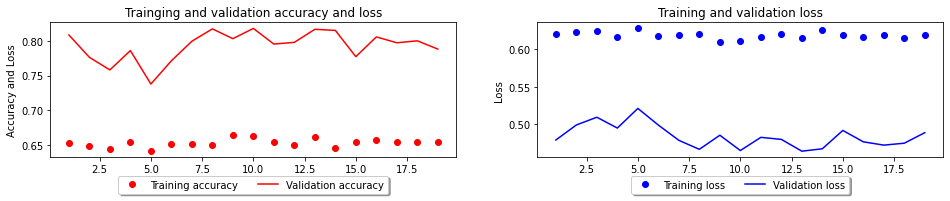

In [66]:
import matplotlib.pyplot as plt

def show_graph(history_dict):
    accuracy = history_dict['acc']
    val_accuracy = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()
show_graph(history.history)


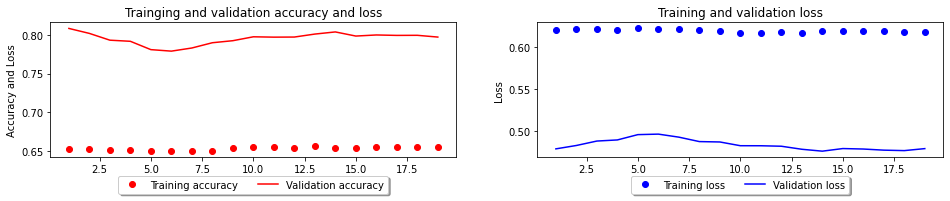

In [67]:
def smooth_curve(points, factor=.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_data = {}
for key, val in history.history.items():
    smooth_data[key] = smooth_curve(val)
show_graph(smooth_data)


#모델 평가

In [ ]:
!ls -l /content/gdrive/MyDrive/KAIST/SEP592/checkpoints | grep resnet50 | grep brca

-rw------- 1 root root 6144 Jun  7 23:29 210608_0741_resnet50_brca_12_300_300_aug.h5
-rw------- 1 root root 6144 Jun  7 12:31 resnet50_brca_32_100_100_aug.h5
-rw------- 1 root root 6144 Jun  7 17:16 resnet50_brca_32_100_100_aug_test.h5
-rw------- 1 root root 6144 Jun  6 12:36 resnet50_brca_32_100_10_2.h5
-rw------- 1 root root 6144 Jun  7 04:24 resnet50_brca_32_100_10_aug.h5
-rw------- 1 root root 6144 Jun  6 04:07 resnet50_brca_32_100_10.h5
-rw------- 1 root root 6144 Jun  5 06:01 resnet50_brca_32_100.h5


In [ ]:
load_status = model.load_weights('%s/%s' % (WEIGHT_DIR_PATH, '210608_0741_resnet50_brca_12_300_300_aug.h5'))

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics=['acc'],
)

In [83]:
testGenerator = ImageDataGenerator(
    rescale=1./255
)

testGen = testGenerator.flow_from_directory(
    os.path.join(rootPath, 'test_set'),
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle = False,  
)


Found 10080 images belonging to 2 classes.


In [84]:
#model.evaluate_generator(testGen)
testevaluation = model.evaluate_generator(testGen, verbose=1, steps=testGen.samples//32, workers = 300)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


315/315 [==============================] - 29s 89ms/step - loss: 1.0890 - acc: 0.5284


In [85]:
testevaluation

[1.0889679193496704, 0.5283730030059814]

In [86]:
#Predicting the classes of images
testprediction = model.predict_generator(testGen, verbose=1, steps=testGen.samples//32)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2001: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


315/315 [==============================] - 39s 123ms/step


In [87]:
print(testGen.class_indices)
print(testprediction)

{'Normal': 0, 'TIL': 1}
[[0.8522474  0.14775263]
 [0.8522474  0.14775263]
 [0.90057737 0.0994226 ]
 ...
 [0.8497625  0.15023755]
 [0.85247207 0.147528  ]
 [0.8221902  0.17780975]]


In [88]:
testGen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [89]:
testprediction[:,0]

array([0.8522474 , 0.8522474 , 0.90057737, ..., 0.8497625 , 0.85247207,
       0.8221902 ], dtype=float32)

In [90]:
testprediction[:,1]

array([0.14775263, 0.14775263, 0.0994226 , ..., 0.15023755, 0.147528  ,
       0.17780975], dtype=float32)

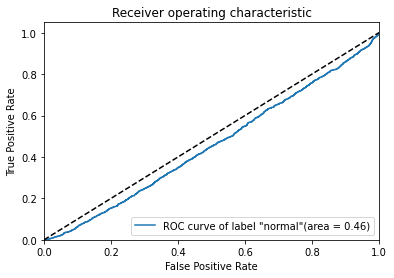

In [91]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,0])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "normal"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


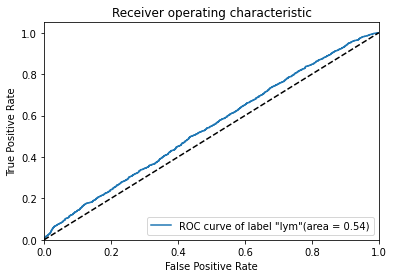

In [92]:
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

nn_fpr, nn_tpr, nn_th = roc_curve(testGen.classes, testprediction[:,1])
auc_pred = auc(nn_fpr, nn_tpr)

plt.figure()
plt.plot(nn_fpr, nn_tpr, label='ROC curve of label "lym"(area = %0.2f)' % auc_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [93]:
len(testGen.labels)
#for i in range(100):

# answer가 0인데 predict가 1이면 failCntArr[0]++
failCntArr = [0, 0]
allCntArr = [0, 0]
for i in range(len(testprediction)):
  prdIdx = 1 if testprediction[i][0] < testprediction[i][1] else 0
  ansIdx = testGen.labels[i]
  allCntArr[ansIdx] += 1

  if prdIdx == ansIdx : continue
  #print('[FAIL] predict[%d], answer[%d]' % (prdIdx, ansIdx))
  failCntArr[ansIdx] += 1

print('Pass cnt : lym[%d/%d], normal[%d/%d]' % (failCntArr[0], allCntArr[0], failCntArr[1], allCntArr[1]))

Pass cnt : lym[30/5280], normal[4724/4800]
